In [1]:
from fastai.vision.all import *
import torchvision.models as models

print("cuda.is_available: {}".format(torch.cuda.is_available()))

set_seed(1234)

cuda.is_available: True


## Load data for training and validation

In [2]:
def load_data(path):
    # for each image file, parent folder's name will be used as label
    dls = ImageDataLoaders.from_folder(
        path,
        valid_pct=0.2,
        item_tfms=Resize(224),
        bs=64,
    )
    return dls
    
path = "dogs/train/"

dls = load_data(path)

In [3]:
print(f"number of train samples: {dls.train.n}")
print(f"number of valid samples: {dls.valid.n}")

number of train samples: 13647
number of valid samples: 3411


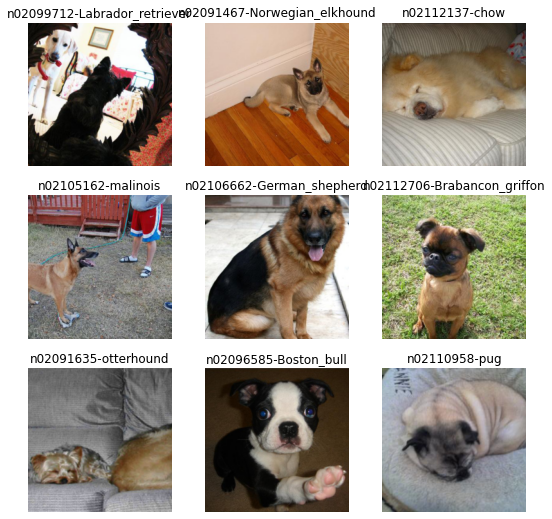

In [4]:
dls.show_batch()

## Train classifier for dog breeds

In [5]:
learn = cnn_learner(dls, models.resnext50_32x4d, cut=-1, pretrained=True, metrics=accuracy)

0.0004786300996784121


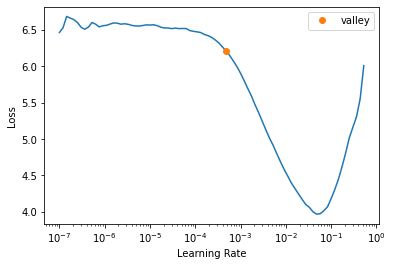

In [6]:
lr_min = learn.lr_find()
print(lr_min.valley)

In [7]:
learn.fit_one_cycle(
    5,
    lr_min.valley,
    cbs=[SaveModelCallback(monitor="accuracy")]
)

epoch,train_loss,valid_loss,accuracy,time
0,1.244345,0.325706,0.898563,01:51
1,0.510151,0.254985,0.922897,01:50
2,0.341416,0.243767,0.921724,01:51
3,0.245469,0.219677,0.933744,01:51
4,0.181094,0.212923,0.935796,01:51


Better model found at epoch 0 with accuracy value: 0.8985634446144104.
Better model found at epoch 1 with accuracy value: 0.9228965044021606.
Better model found at epoch 3 with accuracy value: 0.9337437748908997.
Better model found at epoch 4 with accuracy value: 0.9357959628105164.


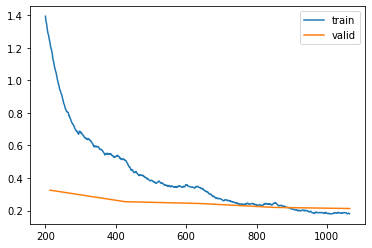

In [8]:
learn.recorder.plot_loss(skip_start=200)

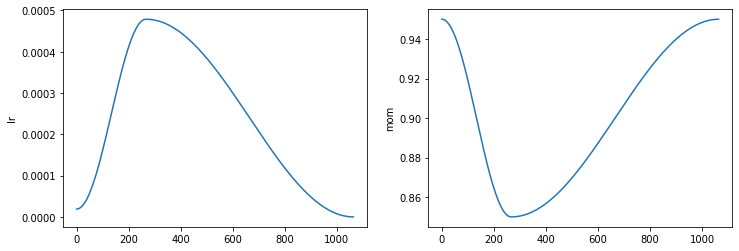

In [9]:
learn.recorder.plot_sched()

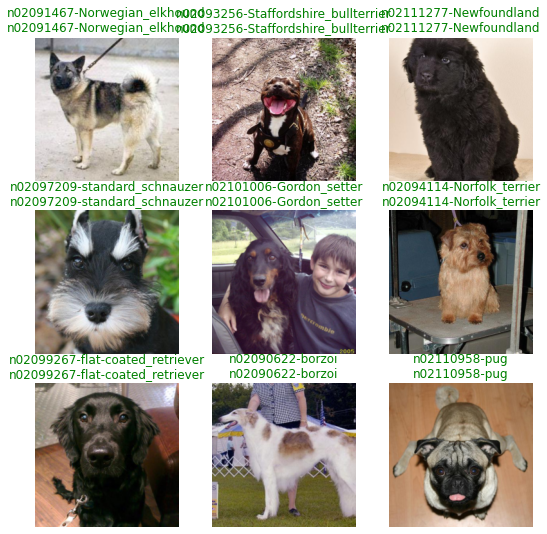

In [10]:
learn.show_results()

In [16]:
Path("models").mkdir(exist_ok=True)
learn.export(Path("models/exported_resnext50_32x4d.pickle").absolute())

## Use trained model to predict the class of some images

In [17]:
# Note: we're reusing images that were used for training,
# but the idea here is just to show that we can do inference
# and get a probability.
paths = get_image_files("dogs/train/")

In [18]:
def test(path):
    img = PILImage.create(path)
    pred, pred_ix, probs = learn.predict(img)
    print(f"Groundtruth class: {path.parent.name}")
    print(f"Predicted   class: {pred} with prob {probs[pred_ix]}")
    show_image(img)

Groundtruth class: n02104365-schipperke
Predicted   class: n02104365-schipperke with prob 0.9999998807907104


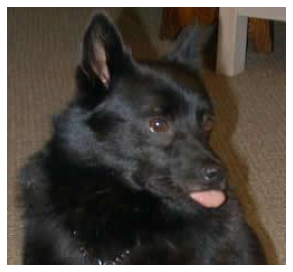

In [19]:
test(paths[0])

Groundtruth class: n02100583-vizsla
Predicted   class: n02100583-vizsla with prob 0.9999880790710449


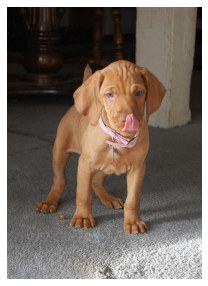

In [20]:
test(paths[200])

Groundtruth class: n02091032-Italian_greyhound
Predicted   class: n02091032-Italian_greyhound with prob 0.7471103072166443


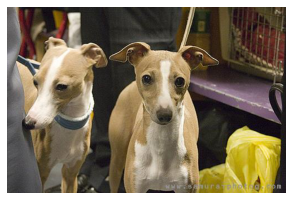

In [21]:
test(paths[400])